In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression


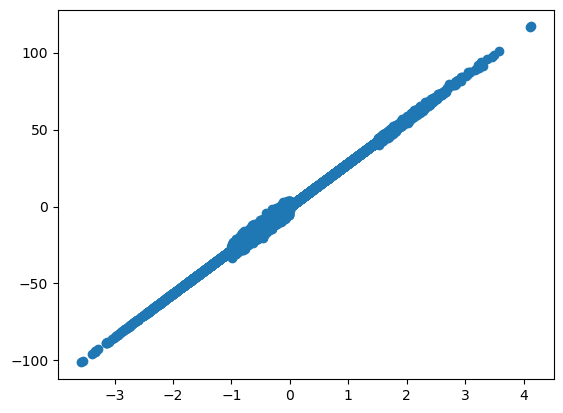

In [2]:
X, y, coef = make_regression(n_samples=10000, n_features=1, noise=0.01, random_state=2, coef=True)

upper_mask = (X >= 1.5)
lower_mask = (X <= 0) & (X > -1)

lower_std = 2
upper_std = 1

upper_noise = np.random.default_rng().normal(loc=0.0, scale=upper_std, size=np.sum(upper_mask))
y[upper_mask.flatten()] += upper_noise

lower_noise = np.random.default_rng().normal(loc=0.0, scale=lower_std, size=np.sum(lower_mask))
y[lower_mask.flatten()] += lower_noise

plt.scatter(X, y)

In [3]:
lower_mask.shape

(10000, 1)

In [4]:
from sklearn.model_selection import train_test_split

import sys
sys.path.append('../')

import tensorflow as tf
from evml.keras.callbacks import get_callbacks, ReportEpoch
from evml.keras.models import EvidentialRegressorDNN

2023-06-09 15:30:39.761175: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)

In [6]:
y_train.shape

(8000, 1)

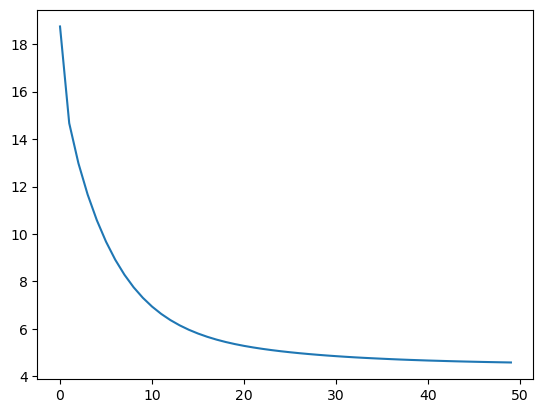

In [58]:
coupling = 10
mlp = EvidentialRegressorDNN(hidden_layers=7,
                            hidden_neurons=200,
                            loss='evidentialCoupled',
                            coupling_coef=coupling,
                            evidential_coef=0.0,
                            epochs = 50,
                            batch_size = 1000)
mlp.build_neural_network(1,1)
history = mlp.fit(X_train, y_train)
plt.plot(history.history['loss'])

8/8 [==============================] - 0s 3ms/step


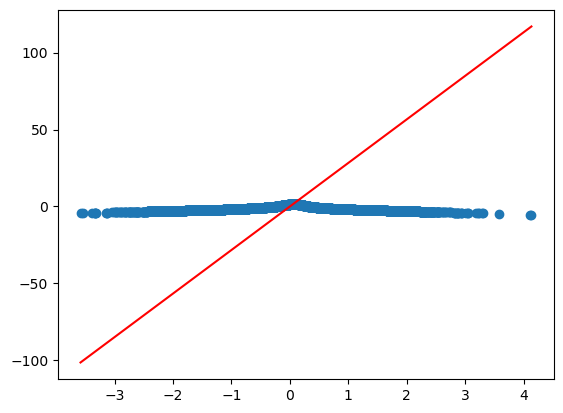

In [59]:
mu, v, alpha, beta = mlp.predict_dist_params(X_train)
plt.scatter(X_train, mu)

Xrange = [np.min(X),np.max(X)]
plt.plot(Xrange, coef * Xrange, color = 'r')

2/2 [==============================] - 0s 3ms/step


Text(0.5, 1.0, 'epistemic uncertainty (green)')

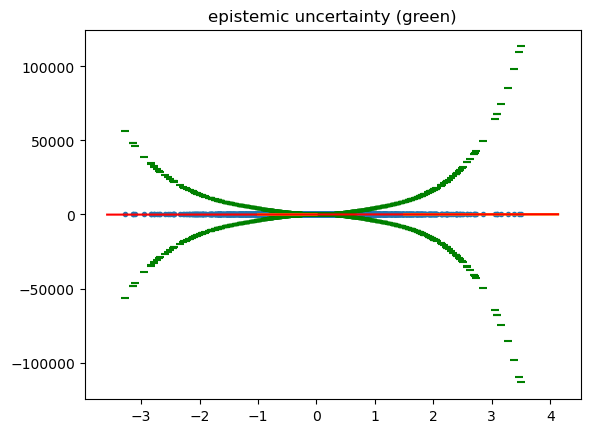

In [60]:


mu, al, epis = mlp.predict(X_test, scaler=None, batch_size=None)

al = np.sqrt(al)
epis = np.sqrt(epis)

ax = plt.gca()

ax.scatter(X_test, mu, marker='.')
ax.scatter(X_test, mu + epis,c = 'g', marker='_')
ax.scatter(X_test, mu - epis,c ='g', marker='_')

lower_x = [np.min(X[lower_mask]), np.max(X[lower_mask])]
upper_x = [np.min(X[upper_mask]), np.max(X[upper_mask])]

ax.plot(lower_x, coef * lower_x + lower_std, color='orange')
ax.plot(upper_x, coef * upper_x + upper_std, color='orange')
ax.plot(lower_x, coef * lower_x - lower_std, color='orange')
ax.plot(upper_x, coef * upper_x - upper_std, color='orange')

ax.plot(Xrange, coef*Xrange, c='r')
ax.set_title('epistemic uncertainty (green)')

Text(0.5, 1.0, 'aleatoric uncertainty (green)')

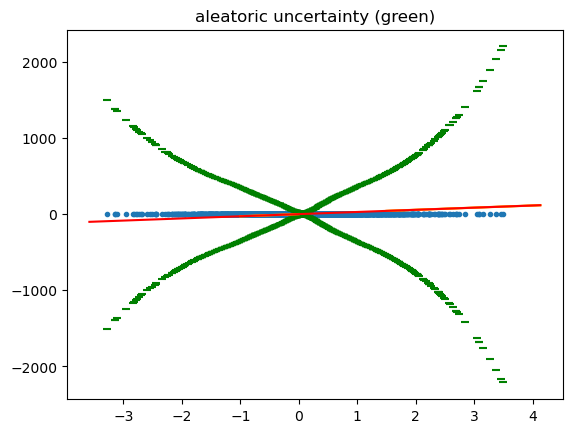

In [61]:
ax = plt.gca()

ax.scatter(X_test, mu, marker='.')
ax.scatter(X_test, mu + al,c = 'g', marker='_')
ax.scatter(X_test, mu - al,c ='g', marker='_')

lower_x = [np.min(X[lower_mask]), np.max(X[lower_mask])]
upper_x = [np.min(X[upper_mask]), np.max(X[upper_mask])]

ax.plot(lower_x, coef * lower_x + lower_std, color='orange')
ax.plot(upper_x, coef * upper_x + upper_std, color='orange')
ax.plot(lower_x, coef * lower_x - lower_std, color='orange')
ax.plot(upper_x, coef * upper_x - upper_std, color='orange')

ax.plot(Xrange, coef*Xrange, c='r')
ax.set_title('aleatoric uncertainty (green)')

In [57]:
np.sum(epis==np.nan)

0

In [12]:
np.min(alpha)

1.0004771

In [13]:
np.min(v)

9.541512e-05

In [14]:
a = np.array([1 + 1e-8]).astype('float32')[0]

In [15]:
a

1.0

In [16]:
a.dtype

dtype('float32')